
## **5. Global Influence (delta)**


### **Introduction**


The global influence coefficient delta controls how strongly each particle is attracted toward the global best solution found by the entire swarm. In simple terms, delta acts as a “follow the leader” force. When delta is high, particles quickly move toward the swarm’s best-known position, which causes very fast convergence but also increases the chance of getting stuck in a poor local optimum because the swarm collapses too quickly. When delta is low, particles only gently drift toward the global best, allowing more exploration and slowing down premature convergence. In our configuration delta was set to 0, meaning the particles completely ignore the global leader and instead rely only on their own best positions (cognitive influence) and their informants (social influence). This encourages wider exploration, prevents early collapse of the swarm, and is particularly helpful when optimising a high-dimensional ANN where too much global pressure would freeze the search too early.

| **delta Range**                      | **Behaviour**                    | **Impact on Search**                                                          | **Typical Outcome**                                                           |
|--------------------------------------| -------------------------------- | ----------------------------------------------------------------------------- | ----------------------------------------------------------------------------- |
| **delta = 0** *(your configuration)* | No pull toward global best       | Maximum exploration; particles rely only on personal + neighbourhood learning | Avoids premature convergence; slower but safer search                         |
| **Low delta (0.1 – 0.5)**            | Gentle global influence          | Helps guide swarm without overpowering diversity                              | Smooth, balanced convergence; good for complex problems                       |
| **High delta (> 1.0)**               | Strong attraction to global best | Swarm collapses rapidly to one region                                         | Very fast convergence but **high risk of getting stuck** in poor local optima |

In [1]:
import sys
from pathlib import Path
from src.train.pipeline import run_pipeline
from src.ann.config import ANNConfig
from src.pso.config import PSOConfig

# project root = parent of "Experimemts"
PROJECT_ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[0]

# Make sure root is on sys.path so we can import train, pso, etc.
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

PROJECT_ROOT


WindowsPath('C:/Users/sajis/PycharmProjects/F21BC-Coursework/src/notebooks/Task 5 - Experiment')

#### **ANN (Fixed)**

In [2]:
# ANN CONFIG
ann_config = ANNConfig(
    input_dim=8,   # 8 features in dataset
    hidden_layers=[
        {"units": 8,  "activation": "relu"}, #Hidden Layer 1
    ],
    output_dim=1,
)


#### **1. PSO -No Global influence**

In [3]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    swarm_size=40,
    iterations=200,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-5.0, 5.0),
    v_clamp=(-2.0, 2.0),
    k_informants=3,
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/200 gbest=14.361456
[PSO] iter 21/200 gbest=9.151461
[PSO] iter 41/200 gbest=8.451078
[PSO] iter 61/200 gbest=8.381790
[PSO] iter 81/200 gbest=8.269052
[PSO] iter 101/200 gbest=8.075702
[PSO] iter 121/200 gbest=8.010798
[PSO] iter 141/200 gbest=7.995042
[PSO] iter 161/200 gbest=7.901172
[PSO] iter 181/200 gbest=7.798385
[PSO] iter 200/200 gbest=7.682571
   gBest=7.6826 | Train MAE=7.6826 | Test MAE=8.1566

 Run 2/10
[PSO] iter 1/200 gbest=13.890079
[PSO] iter 21/200 gbest=9.804719
[PSO] iter 41/200 gbest=8.905819
[PSO] iter 61/200 gbest=8.378397
[PSO] iter 81/200 gbest=8.164689
[PSO] iter 101/200 gbest=8.030575
[PSO] iter 121/200 gbest=7.977176
[PSO] iter 141/200 gbest=7.933039
[PSO] iter 161/200 gbest=7.931011
[PSO] iter 181/200 gbest=7.902948
[PSO] iter 200/200 gbest=7.894880
   gBest=7.8949 | Train MAE=7.8949 | Test MAE=8.5249

 Run 3/10
[PSO] iter 1/200 gbest=15.443184
[PSO] iter 21/200 gbest=9.880370
[PSO] 

C:\Users\sajis\PycharmProjects\F21BC-Coursework\src\train\pipeline.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.94])


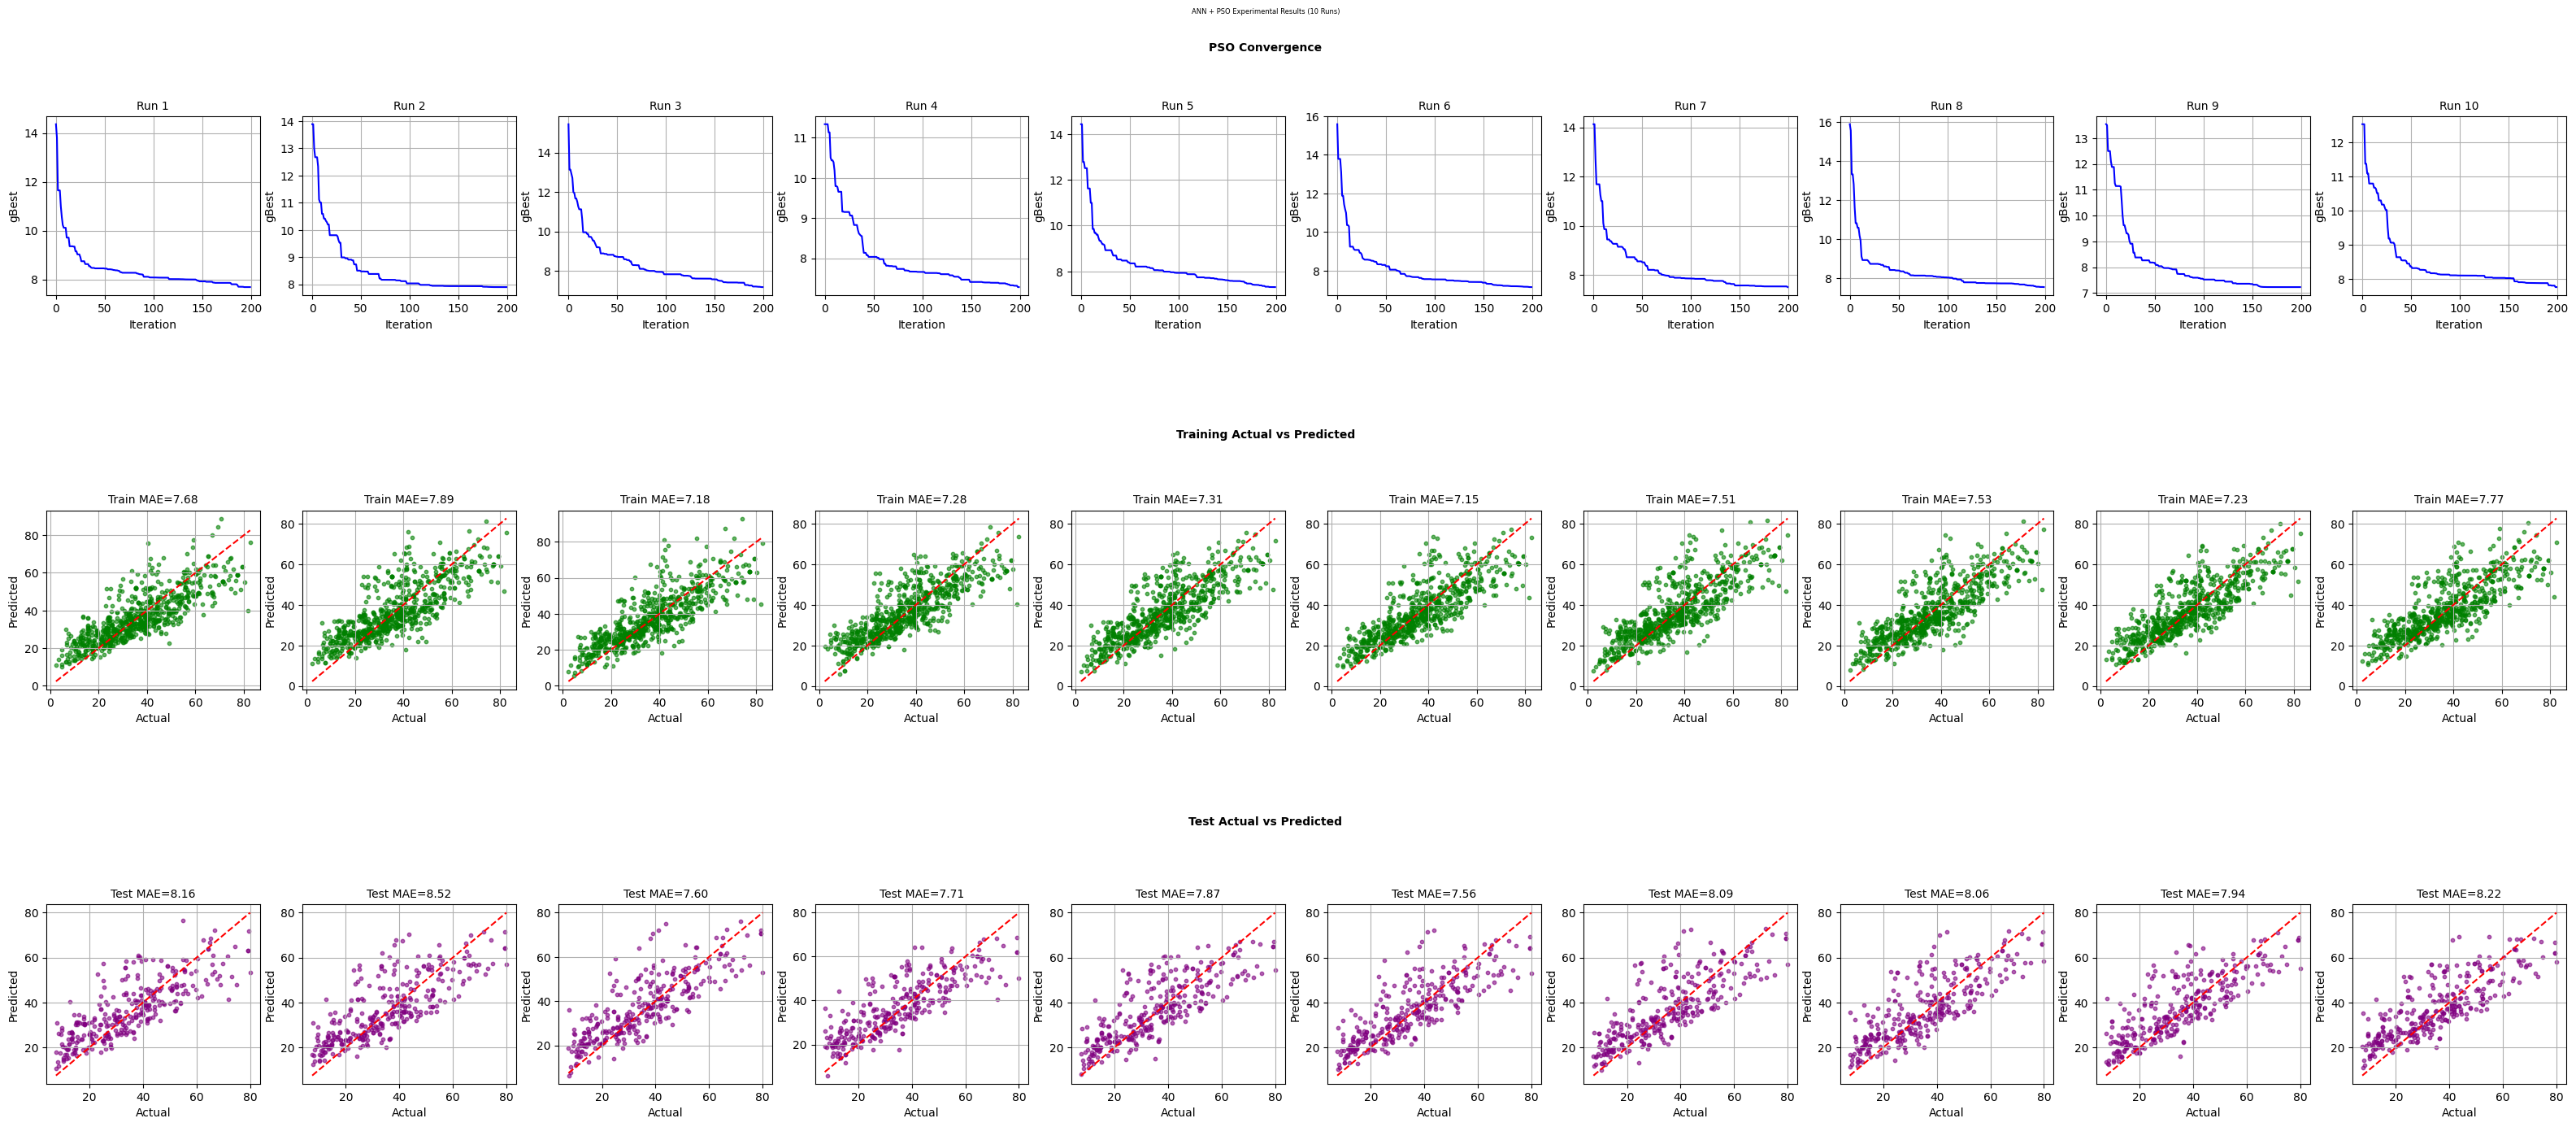


Generating averaged plots across runs...


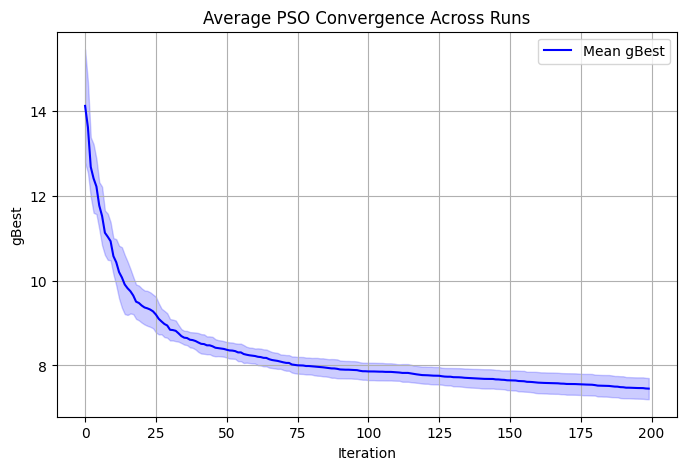

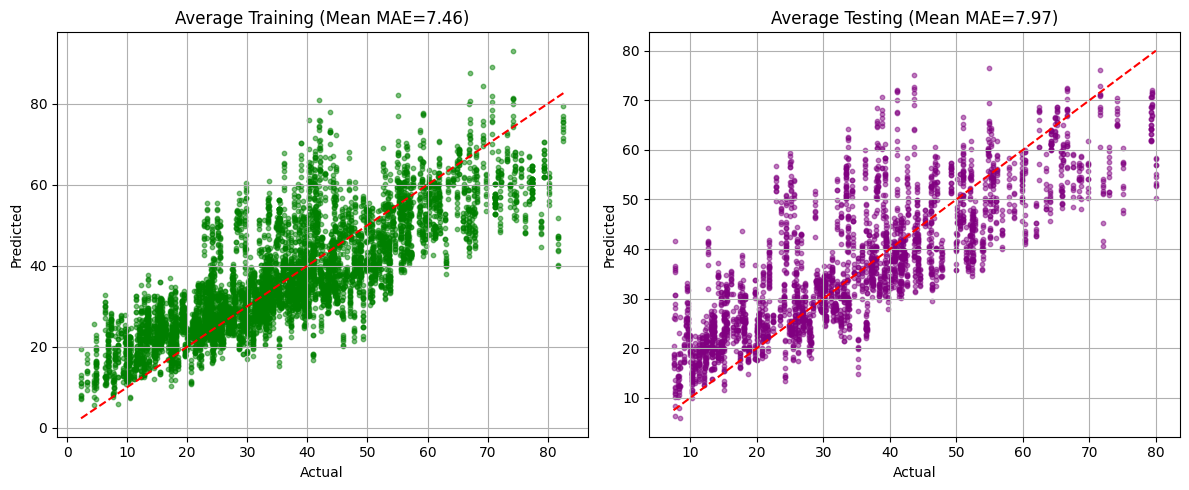

visualization completed.


In [4]:
run_pipeline(ann_config, pso_config,runs=10)

#### **2. PSO -slight damping**

In [5]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    swarm_size=10,
    iterations=50,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.1,
    e=1.0,
    bounds=(-5.0, 5.0),
    v_clamp=(-2.0, 2.0),
    k_informants=3,
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/50 gbest=20.746416
[PSO] iter 6/50 gbest=12.082992
[PSO] iter 11/50 gbest=10.389461
[PSO] iter 16/50 gbest=10.168620
[PSO] iter 21/50 gbest=9.961807
[PSO] iter 26/50 gbest=9.641729
[PSO] iter 31/50 gbest=9.376526
[PSO] iter 36/50 gbest=9.112188
[PSO] iter 41/50 gbest=9.028435
[PSO] iter 46/50 gbest=8.870188
[PSO] iter 50/50 gbest=8.754052
   gBest=8.7541 | Train MAE=8.7541 | Test MAE=9.3266

 Run 2/10
[PSO] iter 1/50 gbest=15.525367
[PSO] iter 6/50 gbest=12.470117
[PSO] iter 11/50 gbest=12.028189
[PSO] iter 16/50 gbest=10.528652
[PSO] iter 21/50 gbest=10.138995
[PSO] iter 26/50 gbest=9.509126
[PSO] iter 31/50 gbest=9.205866
[PSO] iter 36/50 gbest=8.663128
[PSO] iter 41/50 gbest=8.663128
[PSO] iter 46/50 gbest=8.474785
[PSO] iter 50/50 gbest=8.390043
   gBest=8.3900 | Train MAE=8.3900 | Test MAE=9.1823

 Run 3/10
[PSO] iter 1/50 gbest=14.329830
[PSO] iter 6/50 gbest=11.170428
[PSO] iter 11/50 gbest=10.518103
[PSO

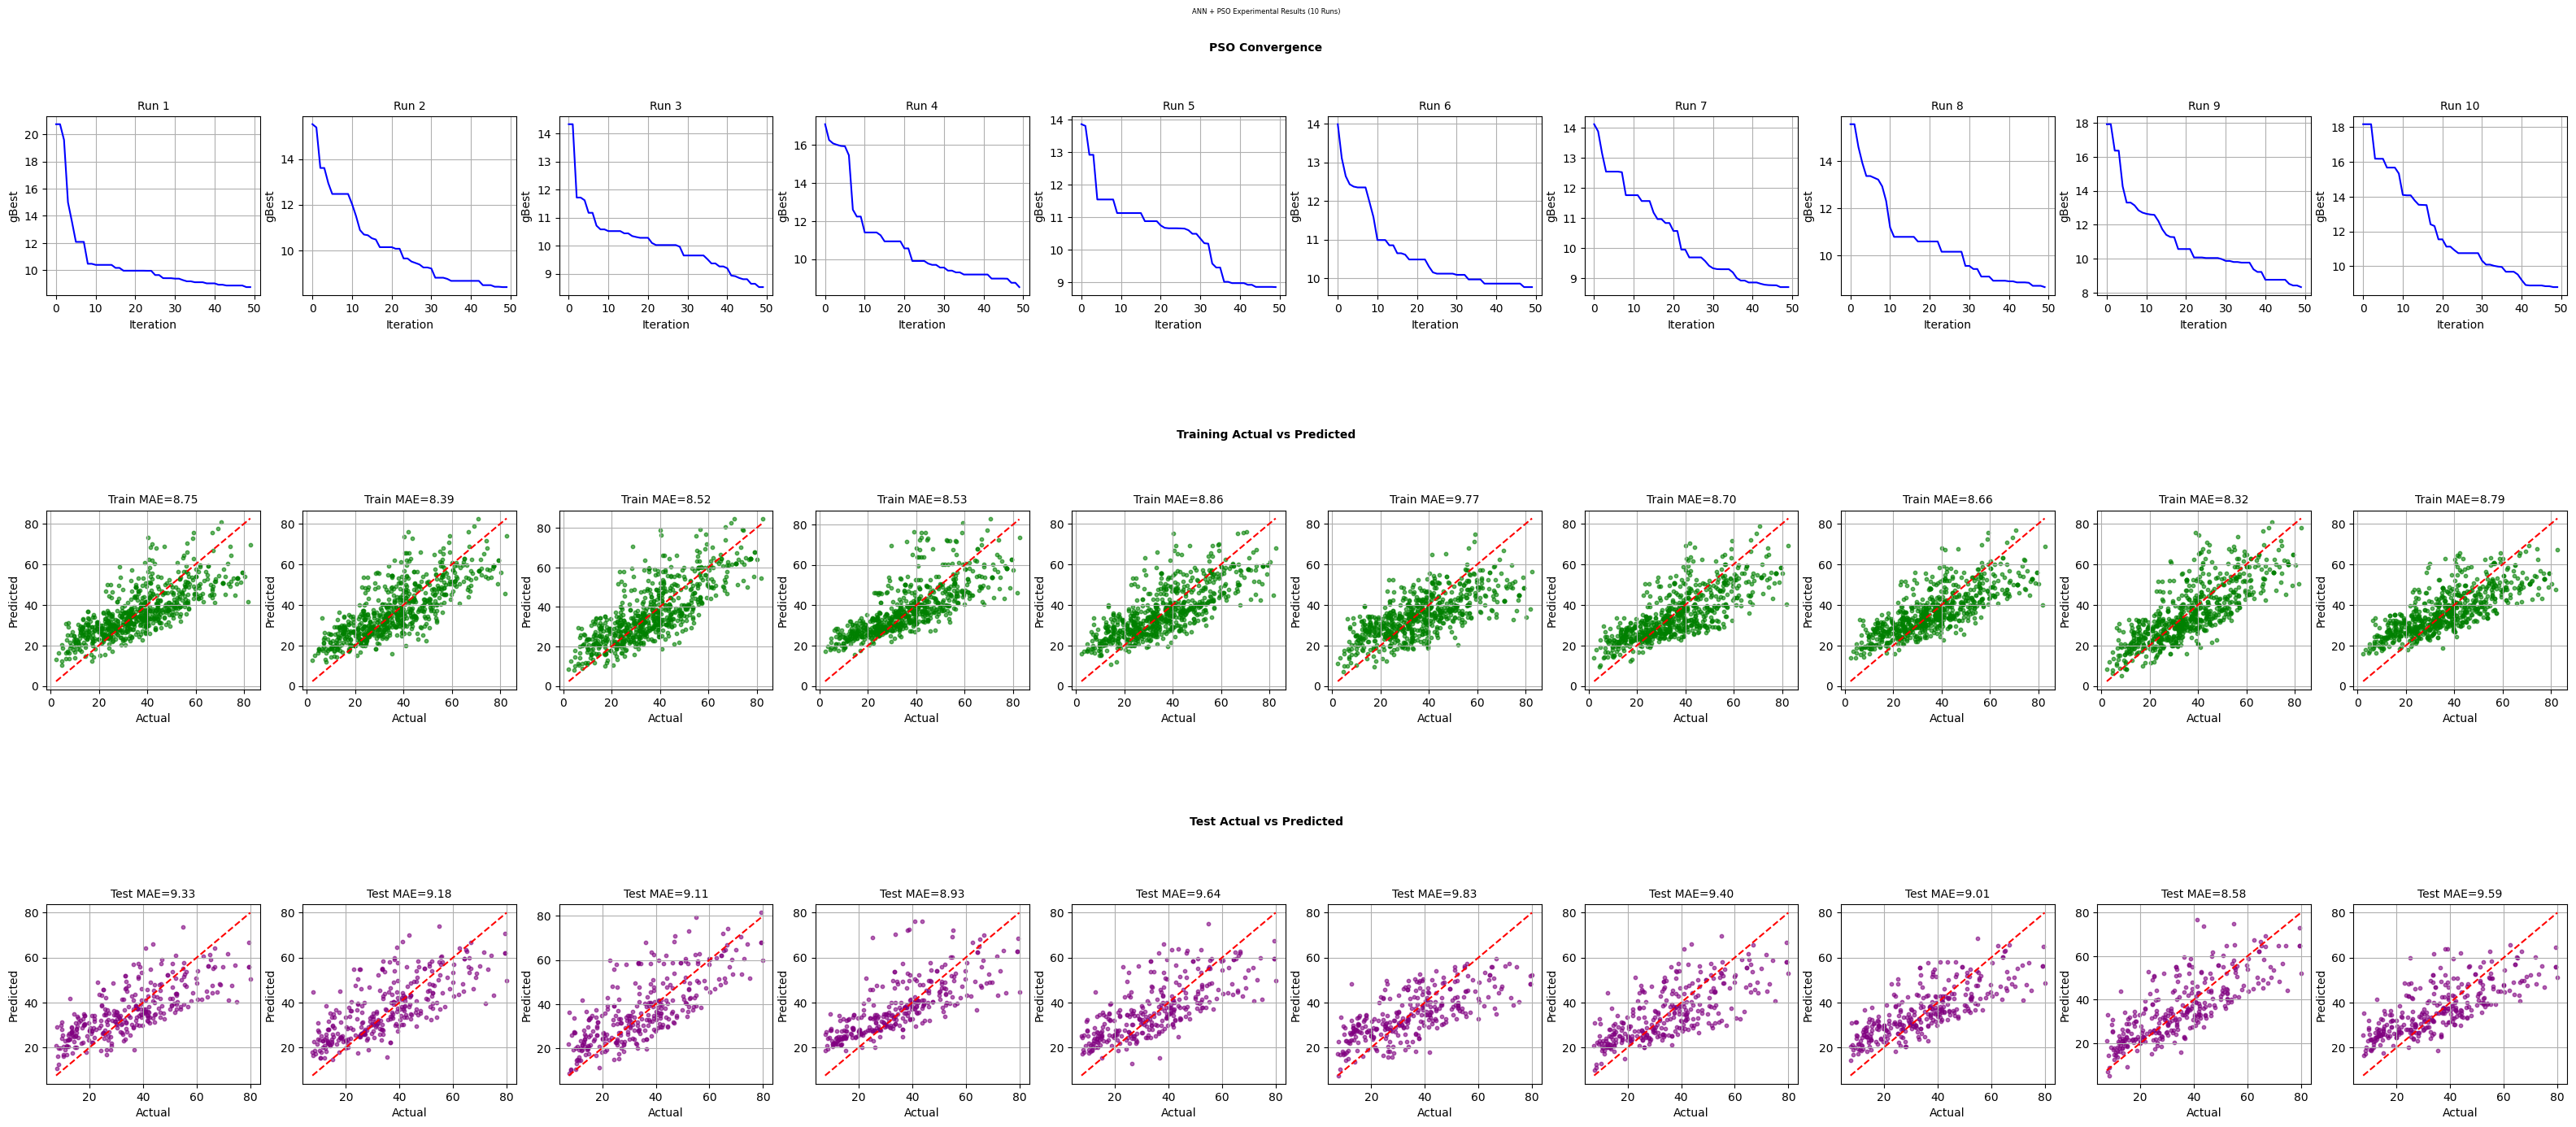


Generating averaged plots across runs...


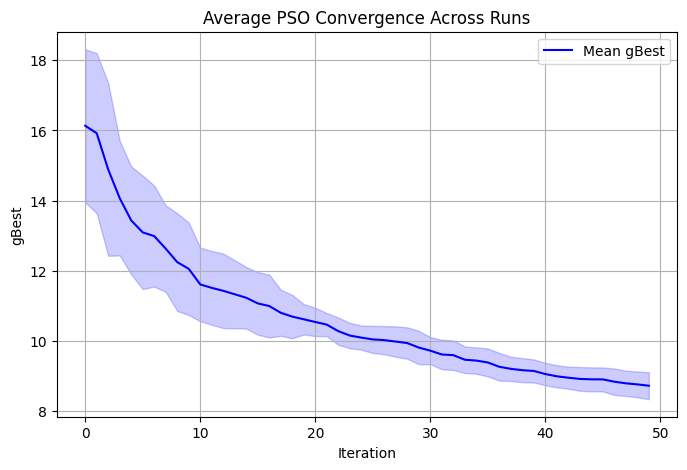

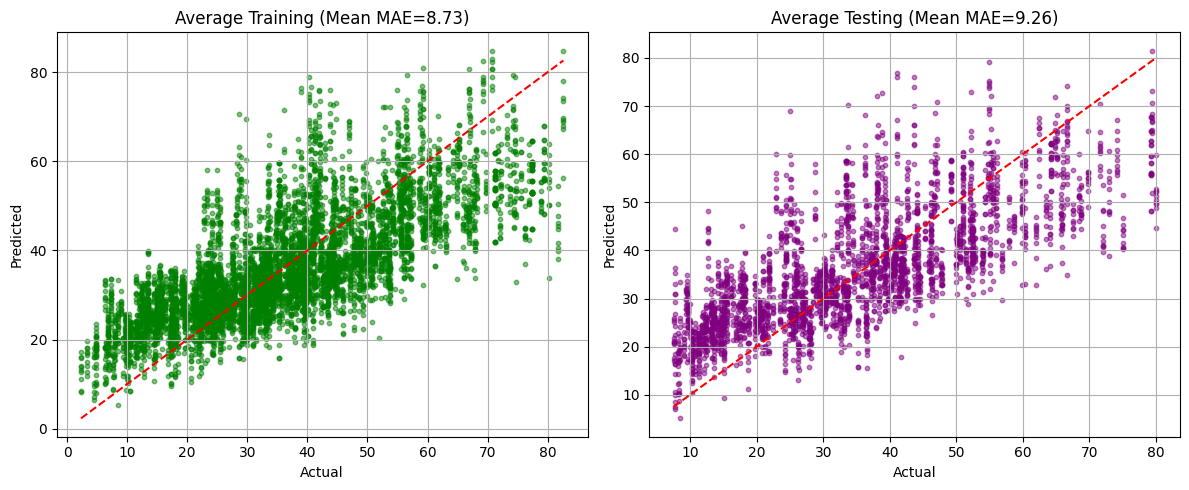

visualization completed.


In [6]:
run_pipeline(ann_config, pso_config,runs=10)

#### **3. PSO - heavier damping**

In [7]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    swarm_size=10,
    iterations=50,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.2,
    e=1.0,
    bounds=(-5.0, 5.0),
    v_clamp=(-2.0, 2.0),
    k_informants=3,
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/50 gbest=15.827494
[PSO] iter 6/50 gbest=12.019197
[PSO] iter 11/50 gbest=11.268810
[PSO] iter 16/50 gbest=11.000992
[PSO] iter 21/50 gbest=9.862401
[PSO] iter 26/50 gbest=9.796602
[PSO] iter 31/50 gbest=9.308539
[PSO] iter 36/50 gbest=9.097153
[PSO] iter 41/50 gbest=9.097153
[PSO] iter 46/50 gbest=8.990679
[PSO] iter 50/50 gbest=8.768471
   gBest=8.7685 | Train MAE=8.7685 | Test MAE=9.1881

 Run 2/10
[PSO] iter 1/50 gbest=18.375677
[PSO] iter 6/50 gbest=13.448719
[PSO] iter 11/50 gbest=11.988868
[PSO] iter 16/50 gbest=11.193975
[PSO] iter 21/50 gbest=10.680923
[PSO] iter 26/50 gbest=10.379895
[PSO] iter 31/50 gbest=10.313420
[PSO] iter 36/50 gbest=9.988714
[PSO] iter 41/50 gbest=9.835971
[PSO] iter 46/50 gbest=9.661505
[PSO] iter 50/50 gbest=9.434060
   gBest=9.4341 | Train MAE=9.4341 | Test MAE=10.4381

 Run 3/10
[PSO] iter 1/50 gbest=20.031739
[PSO] iter 6/50 gbest=14.539823
[PSO] iter 11/50 gbest=12.472809
[

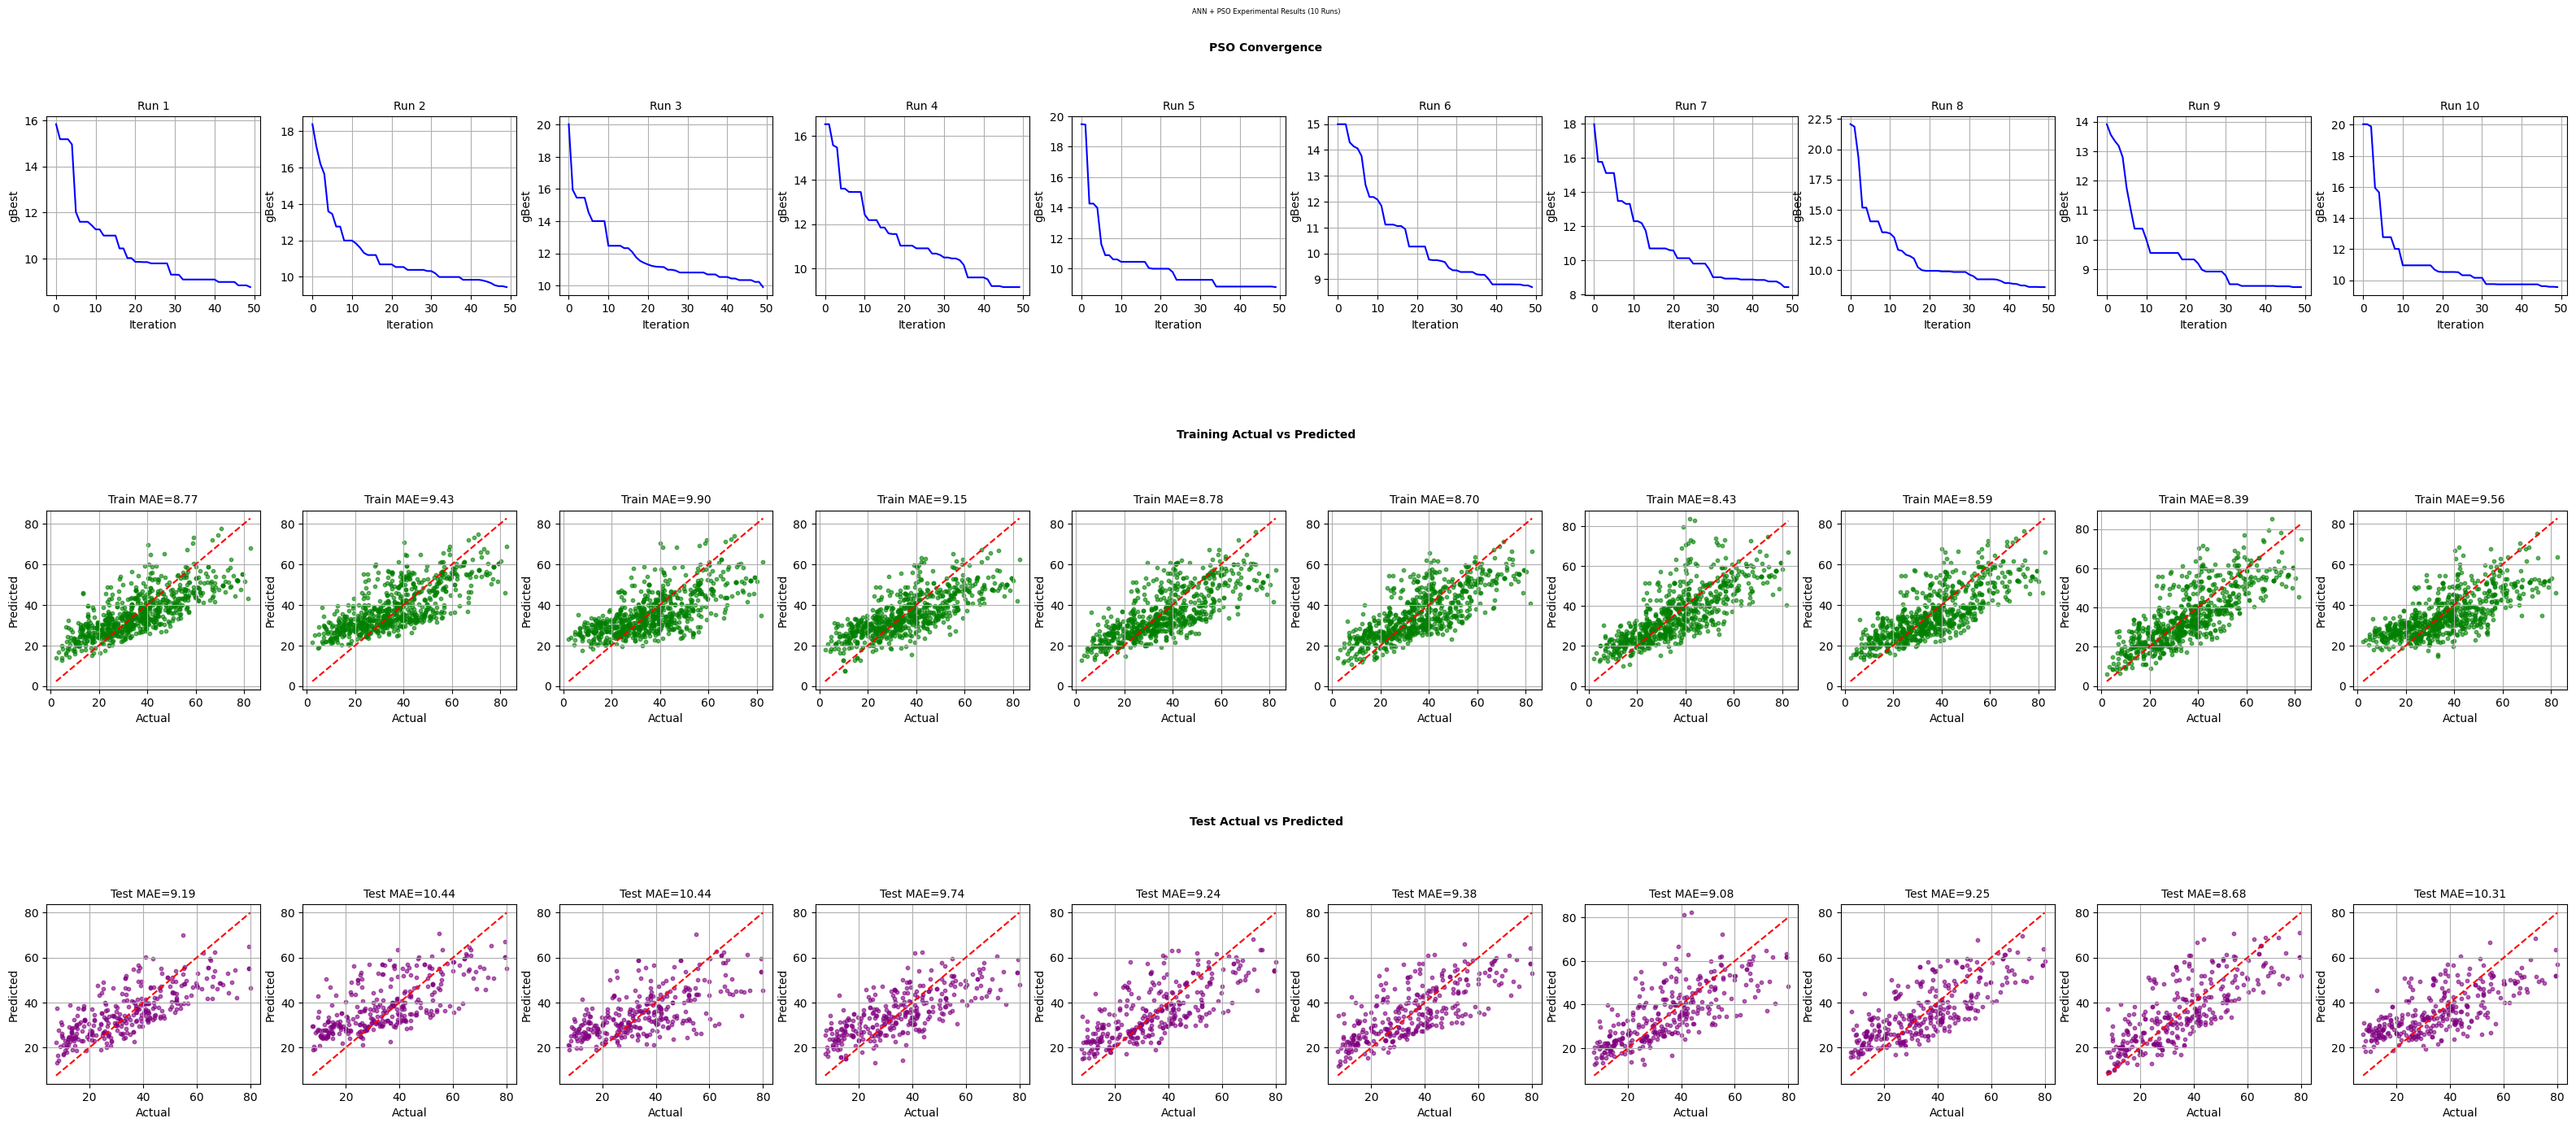


Generating averaged plots across runs...


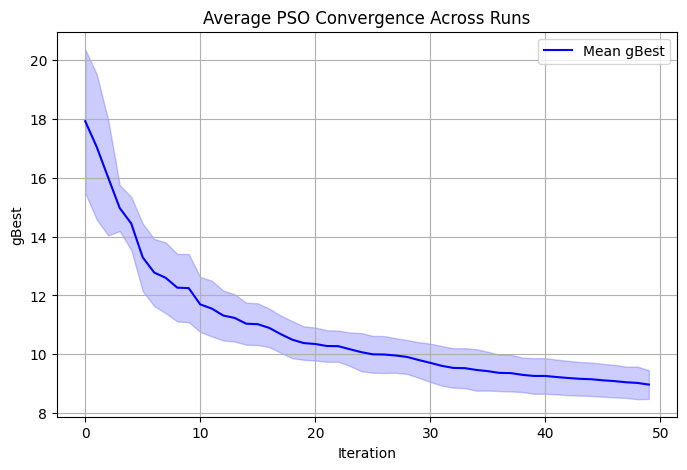

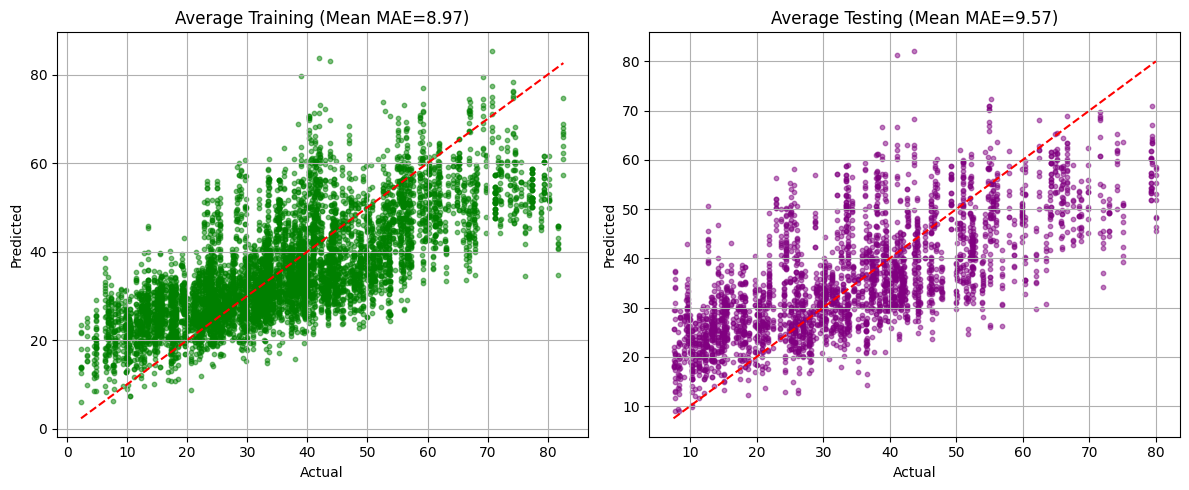

visualization completed.


In [8]:
run_pipeline(ann_config, pso_config,runs=10)

#### **Results & Discussion**

The global influence coefficient delta controls how strongly each particle is pulled towards the global best solution found by the swarm. The experimental results show that δ has a clear and measurable impact on optimisation quality. When δ=delta = 0.0 (no global influence), the PSO–ANN model achieves the best performance, with the lowest average Train MAE (7.4550 ± 0.2494) and Test MAE (7.9720 ± 0.2851). This configuration encourages exploration because particles rely only on their personal best and their informants, preventing premature convergence. Increasing delta to 0.5 leads to noticeably worse results (Train MAE = 8.7303 ± 0.3842, Test MAE = 9.2591 ± 0.3557), as the swarm becomes more synchronised and diversity decreases. When delta is increased further (δ = 1.0), performance deteriorates even more (Train MAE = 8.9697 ± 0.4889, Test MAE = 9.5747 ± 0.5919), suggesting that strong attraction to the global best forces the swarm to converge too early, trapping the optimisation in poor local minima. These findings are fully consistent with the established PSO literature (Kennedy & Eberhart, 1995; Clerc & Kennedy, 2002), which highlights that excessive global influence reduces swarm diversity, destabilises the search, and negatively affects performance when optimising highly non-convex problems such as ANN weights. Overall, the experiments confirm that δ = 0.0 provides the best balance of exploration and convergence for this problem.

| **delta Value**      | **Swarm Size** | **Iterations** | **Train MAE (± SD)** | **Test MAE (± SD)** | **Overall Performance**              |
|----------------------| -------------- | -------------- | -------------------- | ------------------- | ------------------------------------ |
| **0.0** *(baseline)* | 40             | 200            | **7.4550 ± 0.2494**  | **7.9720 ± 0.2851** |  **Best — stable, strong performance** |
| **0.5**              | 10             | 50             | **8.7303 ± 0.3842**  | **9.2591 ± 0.3557** |  Worse — weaker convergence          |
| **1.0**              | 10             | 50             | **8.9697 ± 0.4889**  | **9.5747 ± 0.5919** |  Worst — unstable global pulls       |
